<a href="https://colab.research.google.com/github/rpdahxn/CV_PaperReview/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한빛미디어 'GAN첫걸음' 을 참고해서 작성한 코드입니다.

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, numpy, random
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [15]:
class MnistDataset(Dataset):

  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header = None)
    pass

  # Dataset클래스에서 데이터셋을 상속받을 구현해야하는 특수 메서드 1
  def __len__(self):
    return len(self.data_df)

  # 특수 메서드 2
  def __getitem(self, index):
    # 이미지 목표 레이블
    label = self.data_df.iloc[index, 0]
    target = torch.zeros((10))
    target[label] = 1.0

    # 0~255인 이미지를 0~1로 정규화
    image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

    return label, target, image_values

  def plot_image(self, index):
    img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
    plt.title("label = " + str(self.data_df.iloc[index, 0]))
    plt.imshow(img, interpolation = 'none', cmap = 'Blues')
    pass

  pass

In [16]:
mnist_dataset = MnistDataset('/content/mount/MyDrive/Colab Notebooks/mnist_data/mnist_train.csv')

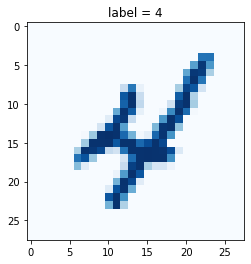

In [18]:
# 데이터 출력해보기

mnist_dataset.plot_image(9)